## Preparing the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
semesters = ['1_Fa17', '2_Sp18', '3_Fa18', '4_Sp19', '5_Fa19']
df = pd.read_csv('Fa17UD75_hashed.csv')
df['Term'] = '1_Fa17'

for semester in semesters[1:]:
    df_curr = pd.read_csv('{}UD75_hashed.csv'.format(semester[2:]))
    df_curr['Term'] = semester
    df = df.append(df_curr, sort=False)
    df_curr = None

len(df)

8047

In [3]:
df = df.drop(columns=['Unnamed: 0', 'Semester Year Name Concat'])
df.head()

,Student Id,Entry Status Cd,Educ Non Exam Level Cd,Academic Department Short Nm - Major,Cum Gpa No,Cum Ucb Letgrd Units No,Eot Term Letgrd Units Complete,Eot Term Pnp Units Completed,Eot Trm Tot Letgrd Grd Pnts No,Term
0,f2751edfb91c88e7d8d4554460778dbab4b035afdd66ae...,AD,1,Molecular & Cell Biology,1.700,4.0,4.0,7.0,6.8,1_Fa17
1,09b1837a61be0cb2675dba8f0b6ebb3e01536449225c34...,AD,3,L&S Undeclared,1.534,17.0,8.0,0.0,21.2,1_Fa17
2,73d0b22692eb0d8ad1a0908c6dd88bfcc5e8314dd98d14...,NF,4,Molecular & Cell Biology,2.319,72.0,12.0,2.0,42.8,1_Fa17
3,e6f625c719c35d3bf0b230121547db2c64b73c94778b0b...,NF,4,L&S Undeclared,2.635,70.0,13.0,0.0,39.1,1_Fa17
4,df971964e68a3df5ee7e9e8380a7c0f2e970c253f361dc...,NF,4,Geography,2.324,64.0,12.0,1.0,46.8,1_Fa17


In [4]:
np.std(df['Cum Gpa No']) / np.sqrt(8047)

0.006872165744494834

In [320]:
df['Academic Department Short Nm - Major'].value_counts()

L&S Undeclared                    4540
Molecular & Cell Biology           674
Interdisc Social Science Pgms      430
Mathematics                        314
UG Interdisciplinary Studies       255
Integrative Biology                232
L&S Legal Studies                  145
L&S Data Science                   127
Sociology                          125
Political Science                  113
-                                  106
English                             94
Ag & Resource Econ & Pol            86
Art Practice                        69
Film and Media                      67
Economics                           60
History                             54
Physics                             51
L&S Computer Science                39
Rhetoric                            35
Theater Dance & Perf Stds           34
History of Art                      27
Env Sci, Policy, & Mgmt             27
Psychology                          24
Earth & Planetary Science           24
Astronomy                

In [321]:
df['Resolved'] = ((df['Academic Department Short Nm - Major'] != 'L&S Undeclared') & 
                  (df['Academic Department Short Nm - Major'] != '-')).astype(int)

In [322]:
df['Entry Status Cd'].value_counts()

NF    4896
AD    3143
LM       6
-        2
Name: Entry Status Cd, dtype: int64

In [323]:
df = df[df['Entry Status Cd'] != 'LM']

In [324]:
df[df['Eot Trm Tot Letgrd Grd Pnts No'].isnull()]

,Student Id,Entry Status Cd,Educ Non Exam Level Cd,Academic Department Short Nm - Major,Cum Gpa No,Cum Ucb Letgrd Units No,Eot Term Letgrd Units Complete,Eot Term Pnp Units Completed,Eot Trm Tot Letgrd Grd Pnts No,Term,Resolved
4,e6f625c719c35d3bf0b230121547db2c64b73c94778b0b...,NF,4,L&S Undeclared,2.531,74.0,NaN,NaN,NaN,3_Fa18,0
7,23efd78606d69f707e6bd1a87425fb82ac65e901fa5d3a...,AD,-,L&S Undeclared,1.571,7.0,NaN,NaN,NaN,3_Fa18,0
11,fc83df19b73940c27a746a0ae7564ad734e385bde54750...,NF,4,-,3.005,79.0,NaN,NaN,NaN,3_Fa18,0
24,b00c3275f5d85dff5c0d66c7c11239624e439175862349...,NF,3,L&S Undeclared,2.338,56.0,NaN,NaN,NaN,3_Fa18,0
25,121d8a92df223cab94a005a5b8a481ae1dead9c5f52acc...,NF,4,-,3.192,75.0,NaN,NaN,NaN,3_Fa18,0
...,...,...,...,...,...,...,...,...,...,...,...
1267,2f3bd11bd6078fb9a938190baa919cce5df38da45488fb...,AD,3,L&S Undeclared,2.850,12.0,NaN,NaN,NaN,5_Fa19,0
1279,c0042198709a9f65ea4a499dfb92e8b90d8529b35c72e6...,AD,4,L&S Undeclared,0.000,0.0,NaN,NaN,NaN,5_Fa19,0
1285,df611e364a04019ea3ce0cebdba076a328621d7b0d4f0f...,AD,3,Sociology,2.194,13.0,NaN,NaN,NaN,5_Fa19,1
1302,2ce576c3aa79b19e34fafc0e2530183e2728ffa68ffe21...,AD,4,Film and Media,2.573,44.0,NaN,NaN,NaN,5_Fa19,1


In [325]:
df['Withdrew1'] = df['Eot Trm Tot Letgrd Grd Pnts No'].isnull().astype(int)
df.head()

,Student Id,Entry Status Cd,Educ Non Exam Level Cd,Academic Department Short Nm - Major,Cum Gpa No,Cum Ucb Letgrd Units No,Eot Term Letgrd Units Complete,Eot Term Pnp Units Completed,Eot Trm Tot Letgrd Grd Pnts No,Term,Resolved,Withdrew1
0,f2751edfb91c88e7d8d4554460778dbab4b035afdd66ae...,AD,1,Molecular & Cell Biology,1.700,4.0,4.0,7.0,6.8,1_Fa17,1,0
1,09b1837a61be0cb2675dba8f0b6ebb3e01536449225c34...,AD,3,L&S Undeclared,1.534,17.0,8.0,0.0,21.2,1_Fa17,0,0
2,73d0b22692eb0d8ad1a0908c6dd88bfcc5e8314dd98d14...,NF,4,Molecular & Cell Biology,2.319,72.0,12.0,2.0,42.8,1_Fa17,1,0
3,e6f625c719c35d3bf0b230121547db2c64b73c94778b0b...,NF,4,L&S Undeclared,2.635,70.0,13.0,0.0,39.1,1_Fa17,0,0
4,df971964e68a3df5ee7e9e8380a7c0f2e970c253f361dc...,NF,4,Geography,2.324,64.0,12.0,1.0,46.8,1_Fa17,1,0


In [326]:
df['Withdrew2'] = (df['Academic Department Short Nm - Major'] == '-').astype(int)

In [327]:
df['NF'] = (df['Entry Status Cd'] == 'NF').astype(int)
df['AD'] = (df['Entry Status Cd'] == 'AD').astype(int)

In [328]:
df['Educ Non Exam Level Cd'] = df['Educ Non Exam Level Cd'].astype(str)

---

In [329]:
df[['NF', 'AD']].mean()

NF    0.608879
AD    0.390872
dtype: float64

In [330]:
df_res[['NF', 'AD']].mean()

NF    0.681965
AD    0.318035
dtype: float64

In [331]:
gb_es = df[['Term', 'NF', 'AD']].groupby('Term').mean()
gb_es

,NF,AD
Term,,
1_Fa17,0.445044,0.554956
2_Sp18,0.539932,0.460068
3_Fa18,0.807055,0.192945
4_Sp19,0.597467,0.401830
5_Fa19,0.783764,0.215498


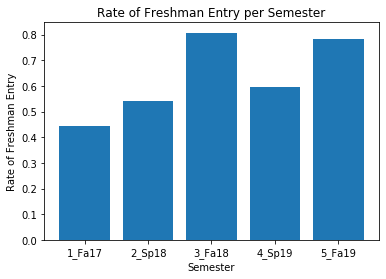

In [332]:
plt.bar(gb_es.index, gb_es['NF'])
plt.xlabel('Semester')
plt.ylabel('Rate of Freshman Entry')
plt.title('Rate of Freshman Entry per Semester');

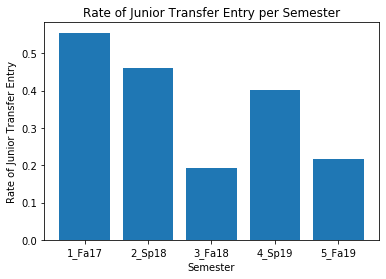

In [333]:
plt.bar(gb_es.index, gb_es['AD'])
plt.xlabel('Semester')
plt.ylabel('Rate of Junior Transfer Entry')
plt.title('Rate of Junior Transfer Entry per Semester');

In [334]:
df['Educ Non Exam Level Cd'].value_counts()

3    4252
4    3203
2     509
-      54
1      23
Name: Educ Non Exam Level Cd, dtype: int64

In [335]:
df_res = df[df['Resolved'] == 1]
df_res['Educ Non Exam Level Cd'].value_counts()

3    1967
4    1317
2     100
-      10
1       5
Name: Educ Non Exam Level Cd, dtype: int64

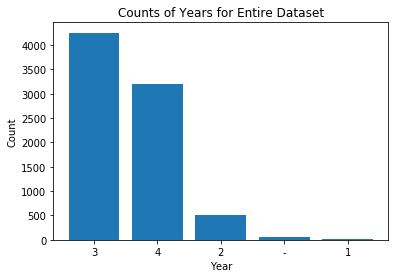

In [336]:
plt.bar(df['Educ Non Exam Level Cd'].value_counts().index, 
        df['Educ Non Exam Level Cd'].value_counts().values)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Counts of Years for Entire Dataset');

In [337]:
id_appear = []

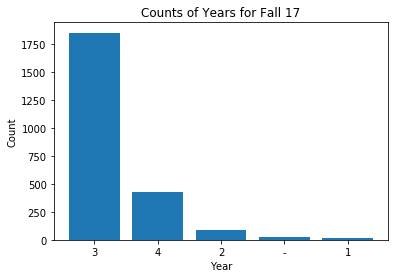

In [338]:
dftemp = df[df['Term'] == '1_Fa17']
plt.bar(dftemp['Educ Non Exam Level Cd'].value_counts().index, 
        dftemp['Educ Non Exam Level Cd'].value_counts().values)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Counts of Years for Fall 17');

In [339]:
id_appear += list(dftemp['Student Id'].unique())

In [340]:
dftemp['Academic Department Short Nm - Major'].value_counts()[:20]

L&S Undeclared                   1389
Molecular & Cell Biology          225
Mathematics                       118
Interdisc Social Science Pgms      93
Political Science                  68
UG Interdisciplinary Studies       61
English                            54
L&S Legal Studies                  54
Integrative Biology                39
Sociology                          36
Art Practice                       34
-                                  31
History                            22
Theater Dance & Perf Stds          19
Physics                            17
Ag & Resource Econ & Pol           16
Film and Media                     12
Anthropology                       12
Earth & Planetary Science           9
Ethnic Studies                      8
Name: Academic Department Short Nm - Major, dtype: int64

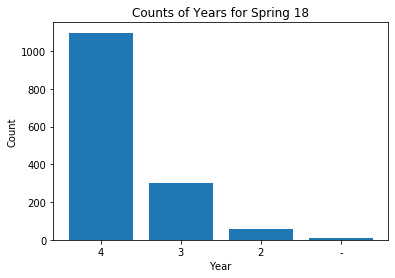

In [341]:
dftemp = df[df['Term'] == '2_Sp18']
plt.bar(dftemp['Educ Non Exam Level Cd'].value_counts().index, 
        dftemp['Educ Non Exam Level Cd'].value_counts().values)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Counts of Years for Spring 18');

In [342]:
id_appear += list(dftemp['Student Id'].unique())

In [343]:
dftemp['Academic Department Short Nm - Major'].value_counts()[:20]

L&S Undeclared                   859
Interdisc Social Science Pgms    123
Mathematics                       55
UG Interdisciplinary Studies      54
Integrative Biology               53
Molecular & Cell Biology          50
Ag & Resource Econ & Pol          39
Sociology                         24
-                                 23
Film and Media                    17
Art Practice                      15
Political Science                 14
Rhetoric                          14
History of Art                    14
L&S Legal Studies                 13
Physics                           13
English                           11
History                            9
Statistics                         6
L&S Envir Econ & Policy            5
Name: Academic Department Short Nm - Major, dtype: int64

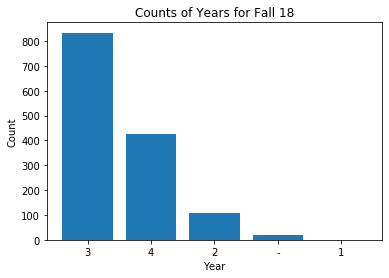

In [344]:
dftemp = df[df['Term'] == '3_Fa18']
plt.bar(dftemp['Educ Non Exam Level Cd'].value_counts().index, 
        dftemp['Educ Non Exam Level Cd'].value_counts().values)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Counts of Years for Fall 18');

In [345]:
id_appear += list(dftemp['Student Id'].unique())

In [346]:
dftemp['Academic Department Short Nm - Major'].value_counts()[:20]

L&S Undeclared                   692
Molecular & Cell Biology         162
Interdisc Social Science Pgms     91
L&S Data Science                  73
Integrative Biology               57
Mathematics                       50
UG Interdisciplinary Studies      46
Sociology                         26
-                                 18
L&S Legal Studies                 18
Political Science                 15
Ag & Resource Econ & Pol          13
L&S Computer Science              11
Economics                         11
History                           11
Film and Media                     9
English                            8
Art Practice                       8
Physics                            6
Linguistics                        5
Name: Academic Department Short Nm - Major, dtype: int64

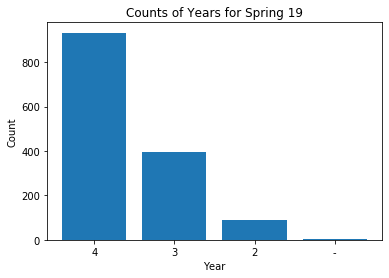

In [347]:
dftemp = df[df['Term'] == '4_Sp19']
plt.bar(dftemp['Educ Non Exam Level Cd'].value_counts().index, 
        dftemp['Educ Non Exam Level Cd'].value_counts().values)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Counts of Years for Spring 19');

In [348]:
id_appear += list(dftemp['Student Id'].unique())

In [349]:
dftemp['Academic Department Short Nm - Major'].value_counts()[:20]

L&S Undeclared                   890
Molecular & Cell Biology          78
UG Interdisciplinary Studies      55
Mathematics                       54
Interdisc Social Science Pgms     45
L&S Legal Studies                 40
Integrative Biology               34
Economics                         23
Sociology                         19
-                                 19
Film and Media                    18
L&S Data Science                  16
English                           15
Rhetoric                          10
Earth & Planetary Science          9
Ag & Resource Econ & Pol           8
Physics                            8
History of Art                     8
Astronomy                          6
History                            6
Name: Academic Department Short Nm - Major, dtype: int64

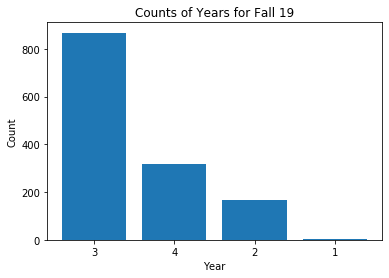

In [350]:
dftemp = df[df['Term'] == '5_Fa19']
plt.bar(dftemp['Educ Non Exam Level Cd'].value_counts().index, 
        dftemp['Educ Non Exam Level Cd'].value_counts().values)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Counts of Years for Fall 19');

In [351]:
id_appear += list(dftemp['Student Id'].unique())

In [352]:
dftemp['Academic Department Short Nm - Major'].value_counts()[:20]

L&S Undeclared                   706
Molecular & Cell Biology         159
Interdisc Social Science Pgms     78
Integrative Biology               49
UG Interdisciplinary Studies      39
L&S Data Science                  38
Mathematics                       37
Economics                         23
Sociology                         20
L&S Legal Studies                 20
L&S Social Welfare                19
L&S Computer Science              18
-                                 15
Political Science                 13
Film and Media                    11
Env Sci, Policy, & Mgmt           11
Ag & Resource Econ & Pol          10
Art Practice                       8
Psychology                         8
Ethnic Studies                     8
Name: Academic Department Short Nm - Major, dtype: int64

In [353]:
gb_res = df[['Term', 'Resolved']].groupby('Term').mean()
gb_res

,Resolved
Term,
1_Fa17,0.411033
2_Sp18,0.397952
3_Fa18,0.488841
4_Sp19,0.360310
5_Fa19,0.467897


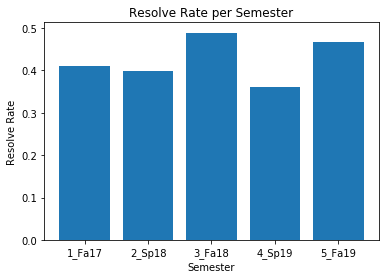

In [354]:
plt.bar(gb_res.index, gb_res.Resolved)
plt.xlabel('Semester')
plt.ylabel('Resolve Rate')
plt.title('Resolve Rate per Semester');

In [355]:
test = dftemp['Student Id'].value_counts().index[0]

In [356]:
dftemp[dftemp['Student Id'] == test]

,Student Id,Entry Status Cd,Educ Non Exam Level Cd,Academic Department Short Nm - Major,Cum Gpa No,Cum Ucb Letgrd Units No,Eot Term Letgrd Units Complete,Eot Term Pnp Units Completed,Eot Trm Tot Letgrd Grd Pnts No,Term,Resolved,Withdrew1,Withdrew2,NF,AD
1182,77a7c033b133e9fdb522112e00ea1cb9d675d4f65f2413...,NF,2,Gender & Womens Studies,3.794,37.0,12.0,4.0,45.6,5_Fa19,1,0,0,1,0
1183,77a7c033b133e9fdb522112e00ea1cb9d675d4f65f2413...,NF,2,L&S Social Welfare,3.794,37.0,12.0,4.0,45.6,5_Fa19,1,0,0,1,0
1184,77a7c033b133e9fdb522112e00ea1cb9d675d4f65f2413...,NF,2,Sociology,3.794,37.0,12.0,4.0,45.6,5_Fa19,1,0,0,1,0


In [358]:
id_appear_df = pd.DataFrame(id_appear)

In [368]:
ids = pd.DataFrame(id_appear_df[0].value_counts() > 1)
ids = ids[ids[0] == True]

In [373]:
df['In'] = df['Student Id'].apply(lambda row: row in ids.index)
df_mult = df[df['In'] == True]

In [374]:
df_mult

,Student Id,Entry Status Cd,Educ Non Exam Level Cd,Academic Department Short Nm - Major,Cum Gpa No,Cum Ucb Letgrd Units No,Eot Term Letgrd Units Complete,Eot Term Pnp Units Completed,Eot Trm Tot Letgrd Grd Pnts No,Term,Resolved,Withdrew1,Withdrew2,NF,AD,In
0,f2751edfb91c88e7d8d4554460778dbab4b035afdd66ae...,AD,1,Molecular & Cell Biology,1.700,4.0,4.0,7.0,6.8,1_Fa17,1,0,0,0,1,True
1,09b1837a61be0cb2675dba8f0b6ebb3e01536449225c34...,AD,3,L&S Undeclared,1.534,17.0,8.0,0.0,21.2,1_Fa17,0,0,0,0,1,True
3,e6f625c719c35d3bf0b230121547db2c64b73c94778b0b...,NF,4,L&S Undeclared,2.635,70.0,13.0,0.0,39.1,1_Fa17,0,0,0,1,0,True
5,979fbd753328c3a0543a64dfcbf7c3c117bb947faab0d1...,NF,3,L&S Undeclared,2.310,39.0,6.0,0.0,11.4,1_Fa17,0,0,0,1,0,True
6,7efa9d1237dd4e516c51d483b71c58fc348b433287c3bb...,NF,-,L&S Undeclared,2.169,80.0,8.0,0.0,13.2,1_Fa17,0,0,0,1,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1344,70c142da332b0d0fdc2605838ae05dbb46a75ba990142b...,NF,2,Psychology,3.618,27.0,6.0,9.0,21.9,5_Fa19,1,0,0,1,0,True
1345,cda114190f4c87fe8c3440c9c297020878c86c1177ed7a...,NF,2,L&S Undeclared,3.697,37.0,11.0,5.0,37.9,5_Fa19,0,0,0,1,0,True
1346,253a8b58c5c63c931403df47cd6a43864d4b1d52d5cc35...,NF,2,L&S Undeclared,2.892,41.0,11.0,NaN,20.2,5_Fa19,0,0,0,1,0,True
1347,15a86ab14081d09bb6c68b2c619369c481472f4adc47fa...,NF,2,L&S Undeclared,3.737,40.0,12.0,1.0,38.4,5_Fa19,0,0,0,1,0,True


In [375]:
df_mult[['NF', 'AD']].mean()

NF    0.534453
AD    0.464977
dtype: float64

In [376]:
df_mult['Educ Non Exam Level Cd'].value_counts()

4    1971
3    1193
2     301
-      31
1      16
Name: Educ Non Exam Level Cd, dtype: int64

---

In [143]:
gb1 = df[['Term', 'Withdrew1', 'Withdrew2']].groupby('Term').mean()
gb1

,Withdrew1,Withdrew2
Term,,
1_Fa17,0.000000,0.012858
2_Sp18,0.000000,0.015700
3_Fa18,0.037437,0.012959
4_Sp19,0.045039,0.013371
5_Fa19,0.043542,0.011070


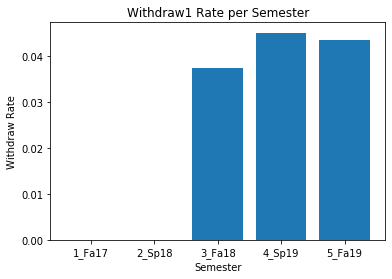

In [150]:
plt.bar(gb1.index, gb1.Withdrew1)
plt.xlabel('Semester')
plt.ylabel('Withdraw Rate')
plt.title('Withdraw1 Rate per Semester');

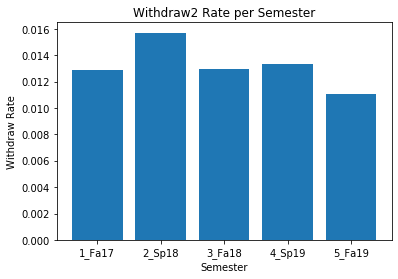

In [151]:
plt.bar(gb1.index, gb1.Withdrew2)
plt.xlabel('Semester')
plt.ylabel('Withdraw Rate')
plt.title('Withdraw2 Rate per Semester');

In [98]:
dfnw = df[df['Withdrew1'] == 0]

In [99]:
dfnw[dfnw['Eot Term Pnp Units Completed'].isnull()]

,Student Id,Entry Status Cd,Educ Non Exam Level Cd,Academic Department Short Nm - Major,Cum Gpa No,Cum Ucb Letgrd Units No,Eot Term Letgrd Units Complete,Eot Term Pnp Units Completed,Eot Trm Tot Letgrd Grd Pnts No,Term,Resolved,Withdrew
0,43ebc54ce244f1e20063c73b4007e641416d78a1ae9c5b...,NF,4,L&S Undeclared,2.795,88.0,8.0,NaN,17.2,3_Fa18,0,0
1,dc5db1944a344fbbca9275a2f131970f0afa59d03428c5...,NF,4,UG Interdisciplinary Studies,2.365,85.0,16.0,NaN,56.4,3_Fa18,1,0
5,d04819b68a78ccf912b725e793eed6ca26100020d8ea1c...,NF,3,L&S Data Science,3.083,53.0,4.5,NaN,17.7,3_Fa18,1,0
6,7efa9d1237dd4e516c51d483b71c58fc348b433287c3bb...,NF,4,L&S Undeclared,2.135,96.0,12.0,NaN,24.0,3_Fa18,0,0
9,ddfe62f011c8c088671a3cc3cb51f5d091d706fb686e97...,NF,4,L&S Undeclared,2.491,76.0,10.0,NaN,34.9,3_Fa18,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1338,cab13e08f9d7e7644a0f277c84dec822daec7ea970ba9a...,NF,2,Mathematics,3.838,47.0,12.0,NaN,44.0,5_Fa19,1,0
1340,f87fb715fb41c987b7e53b0920cd977daf68b353db74d2...,NF,2,L&S Undeclared,2.605,34.0,10.0,NaN,27.4,5_Fa19,0,0
1342,0341f4a280b7749d55629ff2c5b6d959608436b4806947...,NF,2,L&S Undeclared,3.437,51.0,17.5,NaN,53.1,5_Fa19,0,0
1346,253a8b58c5c63c931403df47cd6a43864d4b1d52d5cc35...,NF,2,L&S Undeclared,2.892,41.0,11.0,NaN,20.2,5_Fa19,0,0


In [59]:
dfnw['Eot Term Pnp Units Completed'].unique()

array([ 7. ,  0. ,  2. ,  1. ,  9. ,  5. ,  3. ,  4. ,  8. ,  0.5, 10. ,
        6. ,  3.5,  1.5,  4.5, 12. ,  5.5, 11. ,  2.5,  8.5,  9.5,  6.5,
       22. ,  3.3,  7.5, 13. ,  nan, 15. ])

In [61]:
dfnw['Eot Term Letgrd Units Complete'].unique()

array([ 4. ,  8. , 12. , 13. ,  6. ,  7. , 16. ,  0. , 11. ,  1. , 17. ,
       15. , 14. ,  9. ,  2. , 10. ,  3. , 19. , 21. , 18. , 12.5, 20. ,
        5. , 15.5,  2.7, 23. , 13.5,  9.5, 20.5,  7.5, 16.5,  8.5,  9.6,
       11.5,  3.5, 22. , 14.5, 19.5,  9.9, 19.8, 27. ,  4.5, 10.5, 17.5,
        6.5, 16.2, 10.3, 24. , 25. ])

In [62]:
dfnw['Eot Trm Tot Letgrd Grd Pnts No'].unique()

array([  6.8,  21.2,  42.8,  39.1,  46.8,  11.4,  13.2,  21.3,  49.2,
         0. ,  38.4,  58.8,   3. ,  39.4,  51.1,  40. ,  18.8,  12.7,
         9.2,  50.1,  28. ,  55.5,  18.9,  17.1,  51.3,  22.8,  37.9,
        21.9,  44. ,  29.2,  24. ,   6.9,  52.3,  43.3,  20. ,  28.1,
        34.8,  17.2,   8. ,  52. ,  18.5,  41.2,  40.4,  39. ,  64. ,
        25.2,  29.7,  48.7,  33.9,  23.1,  36.1,  39.6,  24.2,  20.6,
        46.4,  45.8,  17.8,  36. ,   9.9,  45.7,  37.2,  38.8,  53.4,
        33.6,  17.6,  71.7,  25.3,  56. ,  49.6,  33. ,  34.2,  26.9,
        41.6,  29.8,  51.7,  32.4,  26.8,  32. ,  22.4,  47.8,  30. ,
        30.8,  53.2,  22.2,   5.2,  40.9,  26.7,  41.7,  59.2,  35.8,
        39.8,  45.2,  60.4,  57.2,  56.7,  13.6,  54.6,  39.2,  16.1,
        35.6,  21.6,  12. ,  48. ,  41.8,  43.7,  16.5,  48.2,  38.1,
        12.8,  17.3,  40.5,  48.3,  32.3,  30.5,  35.9,  37.6,  45. ,
        16. ,   6. ,  40.3,  50.8,  62.8,  42.4,  47.1,  55.3,  31.6,
        23. ,  50.2,

In [65]:
dfnw_drop = dfnw.dropna()

In [70]:
gb2 = dfnw_drop.groupby('Term').mean()
gb2

,Cum Gpa No,Cum Ucb Letgrd Units No,Eot Term Letgrd Units Complete,Eot Term Pnp Units Completed,Eot Trm Tot Letgrd Grd Pnts No,Resolved,Withdrew,NF
Term,,,,,,,,
1_Fa17,3.068443,36.762588,10.869888,1.920365,34.580382,0.423891,0.0,0.445044
2_Sp18,3.008947,44.947544,11.269577,1.661869,35.312892,0.413370,0.0,0.539563
3_Fa18,3.190941,58.223067,11.070400,2.944400,35.544667,0.500000,0.0,0.854667
4_Sp19,3.143604,44.882392,10.844284,2.848883,34.592116,0.387648,0.0,0.646518
5_Fa19,3.138924,56.987395,10.644958,3.100140,33.524930,0.501401,0.0,0.827731


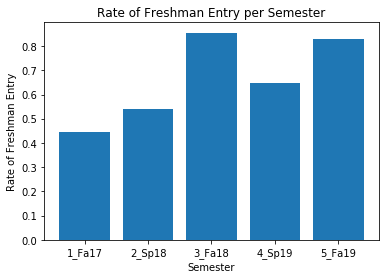

In [76]:
plt.bar(gb2.index, gb2['NF'])
plt.xlabel('Semester')
plt.ylabel('Rate of Freshman Entry')
plt.title('Rate of Freshman Entry per Semester');

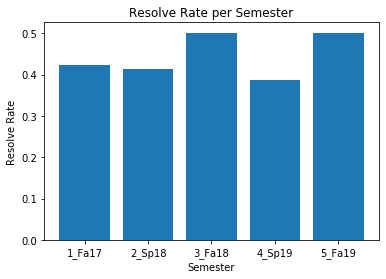

In [196]:
plt.bar(gb2.index, gb2.Resolved)
plt.xlabel('Semester')
plt.ylabel('Resolve Rate')
plt.title('Resolve Rate per Semester');

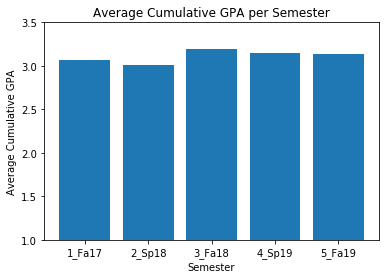

In [80]:
plt.bar(gb2.index, gb2['Cum Gpa No'])
plt.xlabel('Semester')
plt.ylabel('Average Cumulative GPA')
plt.title('Average Cumulative GPA per Semester')
plt.ylim([1,3.5]);

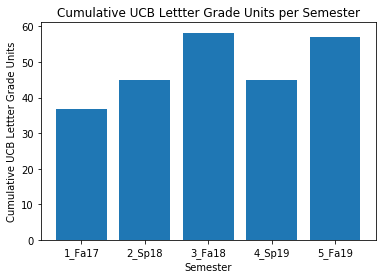

In [82]:
plt.bar(gb2.index, gb2['Cum Ucb Letgrd Units No'])
plt.xlabel('Semester')
plt.ylabel('Cumulative UCB Letter Grade Units')
plt.title('Cumulative UCB Letter Grade Units per Semester');

---